# Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import os
import sys
import cv2

# Function to initialise the mean and vector images

In [2]:
def initBackground(initImage):
    img_arr = mpimg.imread(initImage)
    mean = img_arr
    variance = 9*np.ones(img_arr.shape)
    return(mean,variance)

# Classify images into foreground and background pixels using a Chebyshev inequality based classifier

In [3]:
def ForegroundDetection(img_file,mean,variance,lmda):
    img = mpimg.imread(img_file) 
    d = img - mean
    y = variance*(lmda**2)
    d_2 = np.square(d)
    I = d_2 - y
    mask = np.all(I>0,axis=2)
    # print(mask)
    rI = 255*mask.astype(int)
    # print(rI)
    rI = rI.astype(np.uint8)
    return(rI)

# Reduce the image noise using a voting scheme

In [4]:
def Voting(rI,eta,m,n):
    r,c = rI.shape
    cI = np.zeros((rI.shape[0],rI.shape[1]))
    for i in range(m,r-1-m):
        for j in range(n,c-1-n):
            img_patch = rI[i-m:i,j-n:j]
            y_unq, counts = np.unique(img_patch,return_counts=True)
            if len(counts) == 1 and y_unq[0] == 1:
                cI[i,j] = 255
            if len(counts)>1:
                if counts[1] > eta*m*n:
                    cI[i,j] = 255
    cI = cI.astype(np.uint8)
    return cI

# Update the mean and variance images using a weighted average scheme

In [5]:
def meanvarUpdate(cI,img_path,M,V,alpha):
    img = mpimg.imread(img_path)
    mean_upd = np.zeros(img.shape)
    var_upd = np.zeros(img.shape)
    d = img - M
    d_2 = np.square(d)
    for i in range(cI.shape[0]):
        for j in range(cI.shape[1]):
            if cI[i,j] == 0:
                mean_upd[i,j,:] = (1-alpha)*M[i,j,:] + alpha*img[i,j,:]
                var_upd[i,j,:] = (1-alpha)*(V[i,j,:] + alpha*d_2[i,j,:])
                var_upd[i,j,:] = np.clip(var_upd[i,j,:],a_min = 9,a_max = None)
    # print(mean_upd,var_upd)
    return(mean_upd,var_upd)

In [6]:
def Background_Subtraction(img_dir,lmda,eta,m,n,alpha):
    
    img_file_name = os.listdir(img_dir)
    print(img_file_name)
    initImage = os.path.join(img_dir,img_file_name[0])
    # print(initImage)
    mean, variance = initBackground(initImage)
    # print(mean, variance)
    for i in range(1,len(img_file_name)):
        img_path = os.path.join(img_dir,img_file_name[i])
        
        fig, ax = plt.subplots(1,3,figsize=(10,10))
        rI = ForegroundDetection(img_path,mean,variance,lmda)
        ax[0].imshow(rI,cmap="gray")
        
        cI = Voting(rI,eta,m,n)
        mean, variance = meanvarUpdate(cI,img_path,mean,variance,alpha)
        ax[1].imshow(cI,cmap="gray")
        
        img = mpimg.imread(img_path)
        ax[2].imshow(img,cmap="gray")
        
        print(mean, variance)
        plt.show()
        if i ==10:
            break

['AirstripRunAroundFeb2006_1300.bmp', 'AirstripRunAroundFeb2006_1301.bmp', 'AirstripRunAroundFeb2006_1302.bmp', 'AirstripRunAroundFeb2006_1303.bmp', 'AirstripRunAroundFeb2006_1304.bmp', 'AirstripRunAroundFeb2006_1305.bmp', 'AirstripRunAroundFeb2006_1306.bmp', 'AirstripRunAroundFeb2006_1307.bmp', 'AirstripRunAroundFeb2006_1308.bmp', 'AirstripRunAroundFeb2006_1309.bmp', 'AirstripRunAroundFeb2006_1310.bmp', 'AirstripRunAroundFeb2006_1311.bmp', 'AirstripRunAroundFeb2006_1312.bmp', 'AirstripRunAroundFeb2006_1313.bmp', 'AirstripRunAroundFeb2006_1314.bmp', 'AirstripRunAroundFeb2006_1315.bmp', 'AirstripRunAroundFeb2006_1316.bmp', 'AirstripRunAroundFeb2006_1317.bmp', 'AirstripRunAroundFeb2006_1318.bmp', 'AirstripRunAroundFeb2006_1319.bmp', 'AirstripRunAroundFeb2006_1320.bmp', 'AirstripRunAroundFeb2006_1321.bmp', 'AirstripRunAroundFeb2006_1322.bmp', 'AirstripRunAroundFeb2006_1323.bmp', 'AirstripRunAroundFeb2006_1324.bmp', 'AirstripRunAroundFeb2006_1325.bmp', 'AirstripRunAroundFeb2006_1326.bmp', 

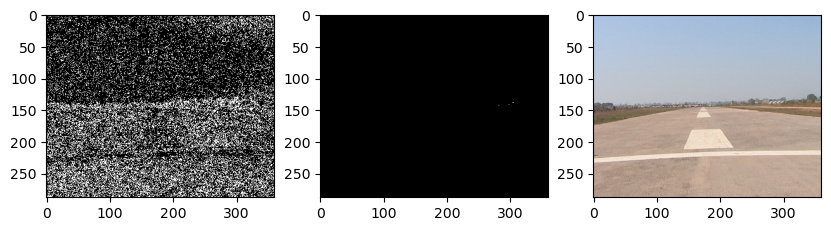

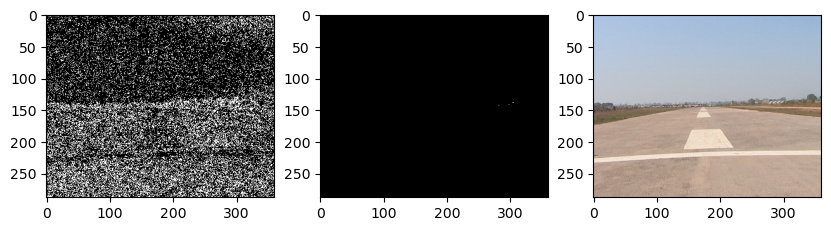

[[[176.56 194.76 231.08]
  [174.36 193.36 231.16]
  [177.8  195.8  232.8 ]
  ...
  [151.96 178.96 215.96]
  [157.36 180.36 212.36]
  [164.88 174.88 196.88]]

 [[175.92 194.12 230.44]
  [173.56 192.56 230.36]
  [175.32 193.32 230.32]
  ...
  [151.96 178.96 215.96]
  [156.28 179.28 211.28]
  [163.8  173.8  195.8 ]]

 [[170.96 195.76 231.04]
  [171.76 196.56 233.32]
  [170.44 195.24 231.2 ]
  ...
  [149.84 180.84 216.84]
  [154.88 182.88 212.88]
  [161.08 176.08 196.08]]

 ...

 [[181.2  156.8  141.6 ]
  [174.   149.6  134.4 ]
  [178.6  153.8  138.84]
  ...
  [191.68 167.68 152.68]
  [187.4  166.48 152.44]
  [182.   169.32 160.16]]

 [[177.04 151.08 142.96]
  [177.96 152.2  144.08]
  [181.6  156.24 147.92]
  ...
  [184.88 161.28 150.08]
  [186.92 165.36 155.16]
  [179.96 168.12 163.12]]

 [[184.84 158.88 150.76]
  [178.48 152.72 144.6 ]
  [174.96 149.6  141.28]
  ...
  [189.92 166.32 155.12]
  [185.44 163.88 153.68]
  [181.   169.16 164.16]]] [[[9.   9.   9.  ]
  [9.   9.   9.  ]
  [9.   

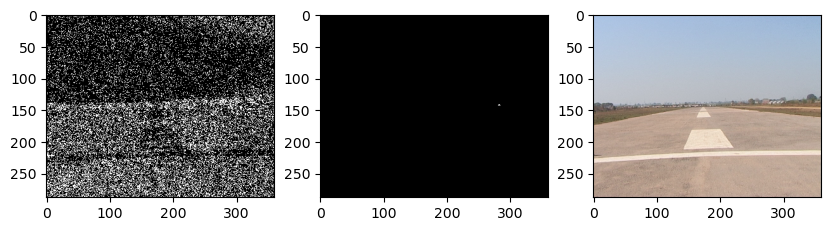

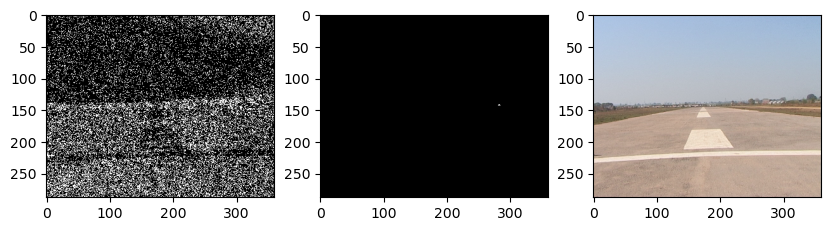

[[[177.712 195.752 231.816]
  [173.272 192.272 230.232]
  [177.16  195.16  232.16 ]
  ...
  [155.192 182.192 219.192]
  [153.872 176.872 208.872]
  [168.976 178.976 200.976]]

 [[176.784 194.824 230.888]
  [175.512 194.512 232.472]
  [175.864 193.864 230.864]
  ...
  [151.192 178.192 215.192]
  [158.456 181.456 213.456]
  [165.56  175.56  197.56 ]]

 [[171.792 196.752 231.808]
  [171.152 196.112 233.064]
  [169.288 194.248 230.24 ]
  ...
  [149.968 180.968 216.968]
  [155.776 183.776 213.776]
  [163.416 178.416 198.416]]

 ...

 [[178.64  153.76  138.72 ]
  [175.6   149.12  134.88 ]
  [178.92  153.96  138.968]
  ...
  [189.536 165.536 150.536]
  [187.88  166.896 152.888]
  [179.6   166.664 157.632]]

 [[177.008 151.016 142.992]
  [177.192 149.64  142.416]
  [177.92  152.048 143.984]
  ...
  [184.976 161.056 150.016]
  [187.784 165.872 155.832]
  [178.392 166.424 161.424]]

 [[179.368 153.376 145.352]
  [178.896 151.344 144.12 ]
  [172.592 146.72  138.656]
  ...
  [190.784 166.864 155.8

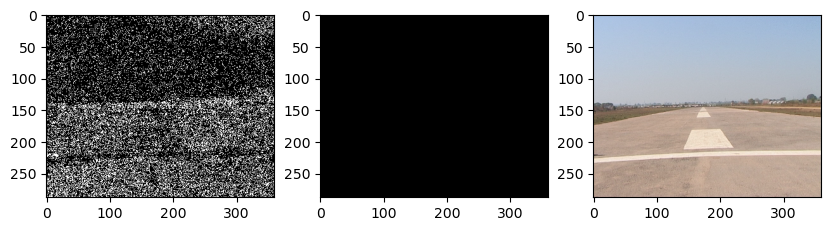

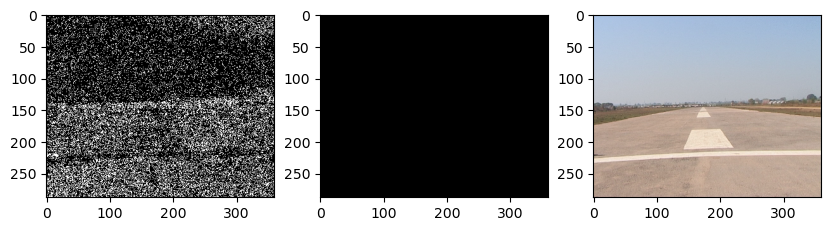

[[[175.5424 194.3504 230.3632]
  [173.8544 192.8544 230.0464]
  [178.632  196.632  233.632 ]
  ...
  [152.6384 179.6384 216.6384]
  [158.7744 181.7744 213.7744]
  [164.9952 174.9952 196.9952]]

 [[175.3568 194.1648 230.1776]
  [173.5024 192.5024 229.6944]
  [175.9728 193.9728 230.9728]
  ...
  [154.2384 181.2384 218.2384]
  [159.6912 182.6912 214.6912]
  [169.112  179.112  201.112 ]]

 [[171.1584 195.3504 230.3616]
  [173.4304 197.6224 233.8128]
  [172.2576 196.4496 232.448 ]
  ...
  [147.5936 178.5936 214.5936]
  [149.5552 177.5552 207.5552]
  [163.8832 178.8832 198.8832]]

 ...

 [[178.128  153.152  138.144 ]
  [179.12   152.224  138.176 ]
  [182.984  157.992  142.9936]
  ...
  [192.3072 168.3072 153.3072]
  [188.776  169.3792 154.5776]
  [182.32   169.3328 160.3264]]

 [[178.6016 152.6032 144.5984]
  [178.6384 150.728  143.6832]
  [177.984  152.0096 143.9968]
  ...
  [182.5952 158.6112 147.6032]
  [186.3568 165.9744 155.1664]
  [182.0784 168.4848 164.2848]]

 [[177.4736 151.4752 143

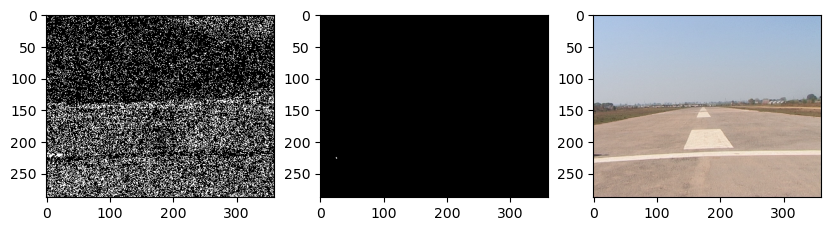

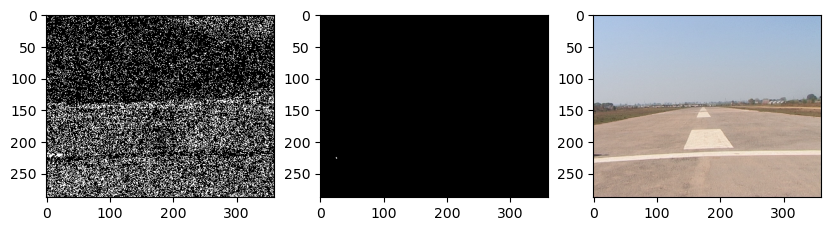

[[[173.50848 192.47008 228.47264]
  [175.57088 194.57088 231.60928]
  [176.5264  194.5264  231.5264 ]
  ...
  [152.12768 179.12768 216.12768]
  [158.15488 181.15488 213.15488]
  [162.59904 172.59904 194.59904]]

 [[175.07136 194.03296 230.03552]
  [173.90048 192.90048 229.93888]
  [175.99456 193.99456 230.99456]
  ...
  [153.24768 180.24768 217.24768]
  [157.53824 180.53824 212.53824]
  [169.8224  179.8224  201.8224 ]]

 [[171.03168 195.07008 230.07232]
  [173.08608 197.12448 233.16256]
  [171.25152 195.28992 231.2896 ]
  ...
  [149.51872 180.51872 216.51872]
  [153.91104 181.91104 211.91104]
  [163.17664 178.17664 198.17664]]

 ...

 [[174.0256  149.8304  134.8288 ]
  [182.224   156.8448  142.0352 ]
  [178.9968  154.7984  140.59872]
  ...
  [192.86144 168.86144 153.86144]
  [188.9552  168.27584 154.11552]
  [179.664   166.66656 157.66528]]

 [[176.52032 151.32064 140.91968]
  [177.32768 150.1456  140.73664]
  [180.3968  155.20192 144.79936]
  ...
  [182.91904 158.92224 147.92064]
  [1

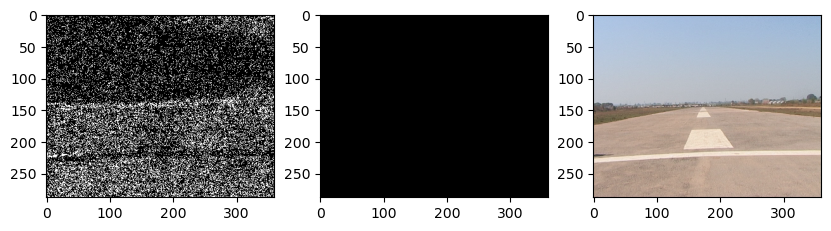

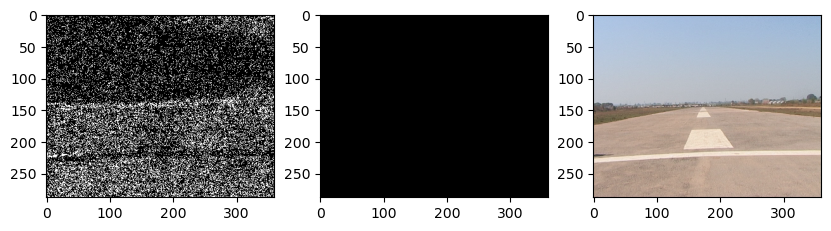

[[[174.701696 193.694016 229.694528]
  [175.914176 194.914176 231.921856]
  [175.30528  193.30528  230.30528 ]
  ...
  [154.425536 179.825536 217.625536]
  [158.030976 180.230976 212.230976]
  [165.319808 174.519808 196.519808]]

 [[176.614272 195.606592 231.607104]
  [174.780096 193.780096 230.787776]
  [175.198912 193.198912 230.198912]
  ...
  [150.649536 176.049536 213.849536]
  [160.307648 182.507648 214.507648]
  [165.96448  175.16448  197.16448 ]]

 [[171.006336 195.014016 230.014464]
  [172.217216 196.224896 232.232512]
  [171.850304 195.857984 231.85792 ]
  ...
  [149.903744 180.103744 216.103744]
  [154.782208 181.182208 211.982208]
  [164.635328 178.035328 198.835328]]

 ...

 [[179.60512  154.76608  139.76576 ]
  [177.2448   150.56896  136.40704 ]
  [179.79936  154.95968  140.919744]
  ...
  [190.572288 165.772288 150.772288]
  [189.79104  170.455168 155.623104]
  [177.5328   164.533312 155.533056]]

 [[180.904064 156.664128 145.783936]
  [177.865536 150.82912  140.947328]


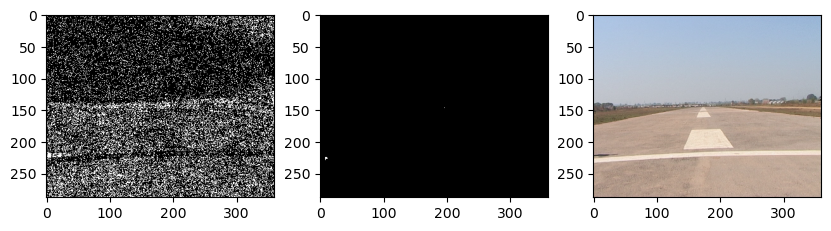

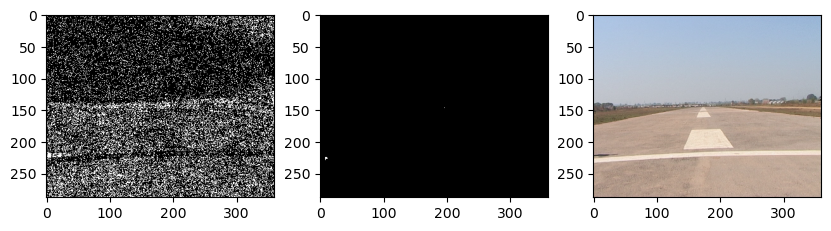

[[[173.3403392 191.5388032 227.5389056]
  [175.9828352 194.9828352 232.7843712]
  [175.061056  193.061056  229.261056 ]
  ...
  [152.4851072 177.5651072 215.5251072]
  [155.6061952 176.0461952 208.8461952]
  [165.8639616 173.3039616 196.1039616]]

 [[176.1228544 194.3213184 230.3214208]
  [173.3560192 192.3560192 230.1575552]
  [176.6397824 194.6397824 230.8397824]
  ...
  [157.3299072 182.4099072 220.3699072]
  [159.2615296 179.7015296 212.5015296]
  [167.592896  175.032896  197.832896 ]]

 [[171.0012672 195.8028032 230.8028928]
  [172.8434432 197.6449792 234.4465024]
  [171.1700608 195.9715968 231.171584 ]
  ...
  [149.1807488 180.0207488 216.0207488]
  [154.9564416 181.0364416 211.9964416]
  [166.5270656 179.6070656 200.5670656]]

 ...

 [[180.721024  155.753216  140.753152 ]
  [180.24896   153.313792  139.281408 ]
  [178.359872  153.391936  139.3839488]
  ...
  [192.5144576 167.5544576 152.5544576]
  [189.158208  170.0910336 155.1246208]
  [181.90656   168.9066624 159.9066112]]

 [

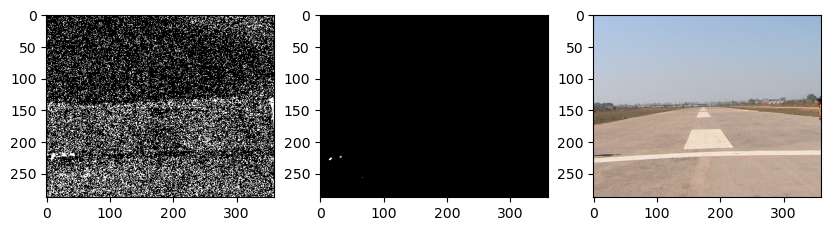

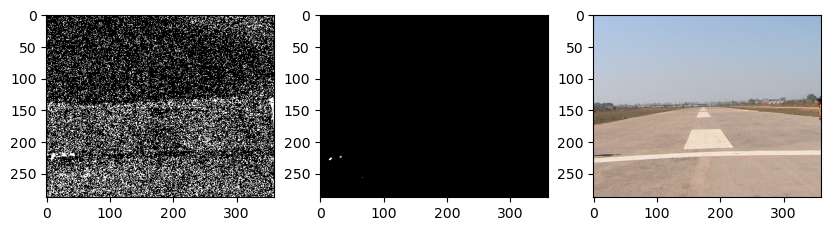

[[[174.66806784 192.70776064 229.50778112]
  [175.19656704 194.19656704 232.15687424]
  [178.2122112  196.2122112  233.0522112 ]
  ...
  [151.29702144 176.31302144 214.30502144]
  [161.52123904 183.20923904 215.36923904]
  [166.77279232 173.86079232 196.82079232]]

 [[173.62457088 191.66426368 228.46428416]
  [173.87120384 192.87120384 230.83151104]
  [176.92795648 194.92795648 231.76795648]
  ...
  [154.66598144 179.68198144 217.67398144]
  [155.85230592 177.54030592 209.70030592]
  [171.1185792  178.2065792  201.1665792 ]]

 [[170.20025344 195.16056064 230.16057856]
  [170.56868864 195.52899584 231.68930048]
  [172.63401216 197.59431936 232.6343168 ]
  ...
  [152.23614976 183.20414976 219.20414976]
  [155.79128832 181.80728832 212.79928832]
  [162.10541312 175.12141312 196.11341312]]

 ...

 [[176.9442048  152.7506432  137.7506304 ]
  [178.449792   153.0627584  138.2562816 ]
  [183.6719744  159.4783872  145.47678976]
  ...
  [192.90289152 167.91089152 152.91089152]
  [189.8316416  17

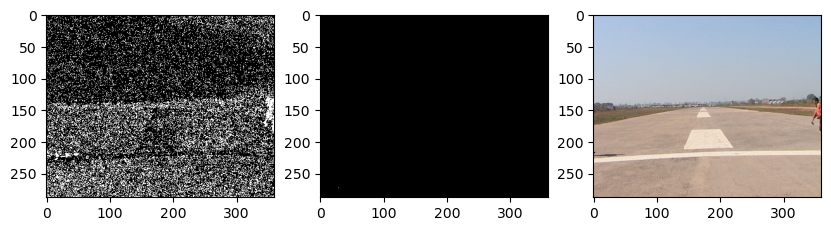

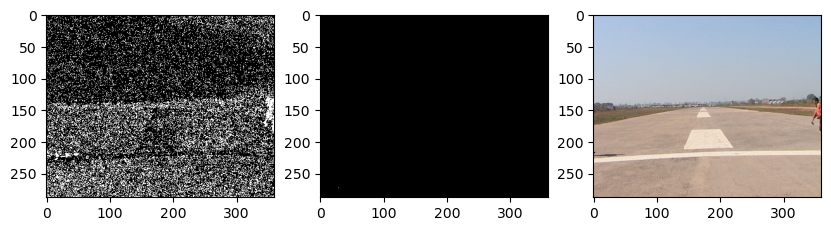

[[[174.13361357 192.94155213 229.90155622]
  [175.03931341 194.03931341 231.23137485]
  [178.04244224 196.04244224 233.01044224]
  ...
  [152.65940429 177.66260429 215.66100429]
  [157.10424781 179.04184781 211.07384781]
  [163.75455846 170.77215846 193.76415846]]

 [[175.52491418 194.33285274 231.29285683]
  [173.97424077 192.97424077 230.16630221]
  [177.7855913  195.7855913  232.7535913 ]
  ...
  [154.93319629 179.93639629 217.93479629]
  [153.57046118 175.50806118 207.54006118]
  [171.02371584 178.04131584 201.03331584]]

 [[172.44005069 196.63211213 231.63211571]
  [170.91373773 195.10579917 230.3378601 ]
  [170.52680243 194.71886387 229.72686336]
  ...
  [153.64722995 184.64082995 220.64082995]
  [151.95825766 179.56145766 209.75985766]
  [166.02108262 179.02428262 200.02268262]]

 ...

 [[178.58884096 154.55012864 139.55012608]
  [177.2899584  152.21255168 137.25125632]
  [180.73439488 156.69567744 142.69535795]
  ...
  [201.7805783  175.1821783  160.9821783 ]
  [189.96632832 17

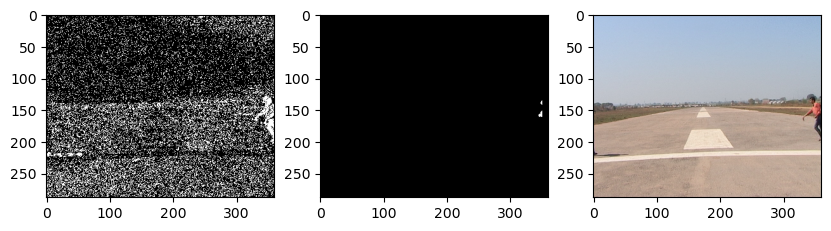

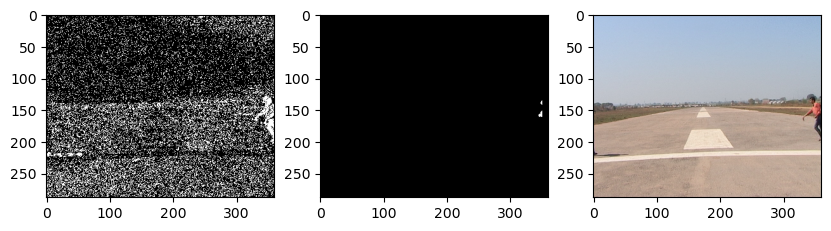

[[[174.82672271 193.78831043 230.78031124]
  [175.80786268 194.80786268 231.84627497]
  [177.20848845 195.20848845 232.20208845]
  ...
  [155.33188086 180.33252086 218.33220086]
  [158.62084956 180.60836956 212.61476956]
  [166.35091169 173.35443169 196.35283169]]

 [[174.30498284 193.26657055 230.25857137]
  [174.79484815 193.79484815 230.83326044]
  [175.55711826 193.55711826 230.55071826]
  ...
  [153.38663926 178.38727926 216.38695926]
  [159.51409224 181.50161224 213.50801224]
  [167.00474317 174.00826317 197.00666317]]

 [[173.68801014 197.72642243 232.72642314]
  [171.78274755 195.82115983 230.86757202]
  [172.50536049 196.54377277 231.54537267]
  ...
  [151.52944599 182.52816599 218.52816599]
  [148.79165153 176.71229153 206.75197153]
  [165.20421652 178.20485652 199.20453652]]

 ...

 [[178.11776819 154.11002573 139.11002522]
  [175.45799168 150.44251034 135.45025126]
  [176.94687898 152.93913549 138.93907159]
  ...
  [195.55611566 168.63643566 154.59643566]
  [189.99326566 17

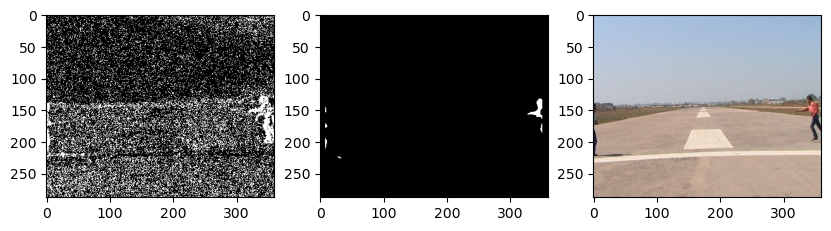

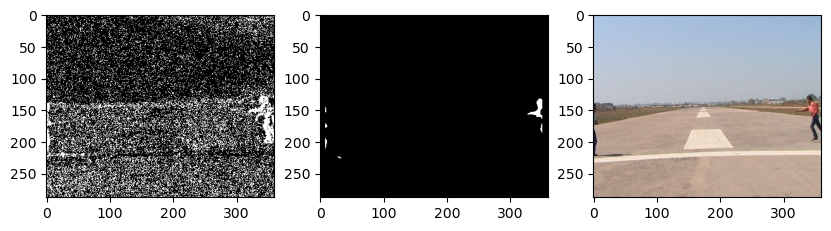

In [7]:
Background_Subtraction("./Images",0.8,0.7,8,8,0.8)